# Aprendizagem supervisionada e exercícios de K vizinhos mais próximos

## Introdução

* Usaremos dados de rotatividade de clientes do setor de telecomunicações nos exercícios da primeira semana. 

* O arquivo de dados é chamado `Orange_Telecom_Churn_Data.csv`. 

* Carregaremos esses dados juntos, faremos algum pré-processamento e usaremos K vizinhos mais próximos para prever a rotatividade de clientes com base nas características da conta.

In [53]:
from __future__ import print_function
import os
data_path = ['../data']

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


## Questão 1

* Comece importando os dados.
* Examine as colunas e os dados.
* Observe que os dados contêm estado, código de área e número de telefone. Você acha que esses são bons recursos para usar ao construir um modelo de aprendizado de máquina? Por que ou por que não?

NOTA: Não os usaremos, então eles podem ser eliminados dos dados.

In [54]:
import pandas as pd

# Import the data using the file path
filepath = os.sep.join(data_path + ['Orange_Telecom_Churn_Data.csv'])
data = pd.read_csv(filepath)

In [55]:
data.head(1).T

,0
state,KS
account_length,128
area_code,415
phone_number,382-4657
intl_plan,no
voice_mail_plan,yes
number_vmail_messages,25
total_day_minutes,265.1
total_day_calls,110
total_day_charge,45.07


In [56]:
# Remove extraneous columns
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [57]:
data.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

## Questão 2

* Observe que algumas colunas são dados categóricos e outras são flutuantes.
* Os recursos categóricos precisarão ser codificados numericamente usando um dos métodos.
* Lembre-se que K-vizinhos mais próximos requerem dados escalonados.
* Dimensione os dados usando um dos métodos de dimensionamento discutidos na aula.

In [58]:
lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])

In [59]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data), columns=data.columns)

## Questão 3

* Separe as colunas de recursos (exceto `churned`) do rótulo (`churned`). Isso criará duas tabelas.
* Ajuste um modelo de K-vizinhos mais próximos com um valor de `k = 3` a esses dados e preveja o resultado com os mesmos dados.

In [60]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in data.columns if x != 'churned']

# Split the data into two dataframes
X_data = data[x_cols]
y_data = data['churned']

In [61]:
knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

## Questão 4

As formas de medir o erro ainda não foram discutidas em aula, mas a precisão é fácil de entender – é simplesmente a porcentagem de rótulos que foram previstos corretamente (verdadeiros ou falsos).

* Escreva uma função para calcular a precisão usando os rótulos real e previsto.
* Usando a função, calcule a precisão deste modelo de K-vizinhos mais próximos nos dados.

In [62]:
# Function to calculate the % of values that were correctly predicted
def accuracy(real, predict):
    return sum(y_data == y_pred) / float(real.shape[0])

In [63]:
print(accuracy(y_data, y_pred))

0.9422


## Questão 5

* Ajuste o modelo K-vizinhos mais próximos novamente com `n_neighbors=3` mas desta vez use a distância para os pesos.
* Calcule a precisão usando a função que você criou acima. 
* Ajuste outro modelo de K-vizinhos mais próximos. Desta vez, use pesos uniformes, mas defina o parâmetro de potência para a métrica de distância de Minkowski como 1 (`p = 1`), ou seja, Distância de Manhattan.

Quando distâncias ponderadas são usadas para a parte 1 desta questão, um valor de 1,0 deve ser retornado para precisão. Por que você acha que isso acontece? 

*Dica:* estamos prevendo os dados e com KNN o modelo *é* os dados. 

Aprenderemos como evitar essa armadilha na próxima palestra.

In [64]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

print(accuracy(y_data, y_pred))

1.0


In [65]:
knn = KNeighborsClassifier(n_neighbors=5, p=2)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

print(accuracy(y_data, y_pred))

0.9284


## Question 6

* Ajuste um modelo de K-vizinhos mais próximos usando valores de `k` (`n_neighbors`) variando de 1 a 20. Use pesos uniformes (o padrão).
* O coeficiente para a distância de Minkowski (`p`) pode ser definido como 1 ou 2 - apenas seja consistente.
* Armazene a precisão e o valor de `k` usado em cada um desses ajustes em uma lista ou dicionário.
* Trace a `precisão` vs `k`. O que você percebe que acontece quando `k = 1`?
* Por que você acha que isso acontece?

* *Dica:* é pelo mesmo motivo discutido acima.

In [70]:
# Fit the K-nearest neighbors model with different values of k
# Store the accuracy measurement for each k

score_list = list()

for k in range(1, 21):
    
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    knn = knn.fit(X_data, y_data)
    
    y_pred = knn.predict(X_data)
    score = accuracy(y_data, y_pred)
    
    score_list.append((k, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

In [71]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

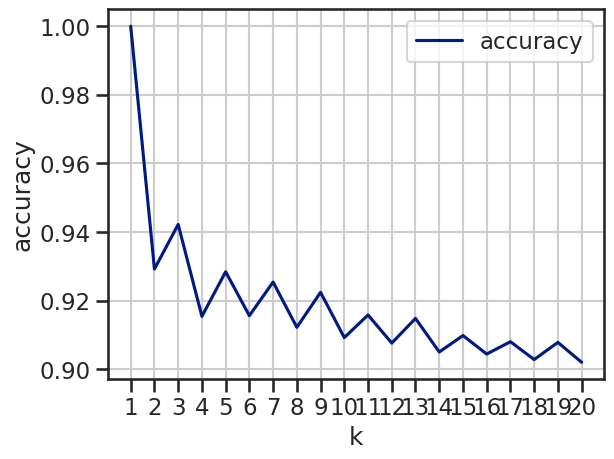

In [72]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
ax = score_df.set_index('k').plot()
ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));
ax.grid()